Testing augmented_data_C01__01__F01.csv

In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data into a Pandas DataFrame
# df = pd.read_csv('simplified_data.csv') 
df = pd.read_csv('../augmented_data/augmented_data__C04__01__F04.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()
print(df.shape)

(1600, 29)


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   estado_vital                       1600 non-null   float64
 1   edad                               1600 non-null   float64
 2   sexo                               1600 non-null   float64
 3   peso                               1600 non-null   float64
 4   hipertension_arterial              1600 non-null   float64
 5   diabetes_mellitus                  1600 non-null   float64
 6   tabaquismo                         1600 non-null   float64
 7   frecuencia_cardiaca                1600 non-null   float64
 8   presion_arterial_sistolica         1600 non-null   float64
 9   presion_arterial_diastolica        1600 non-null   float64
 10  hb                                 1600 non-null   float64
 11  creatinina                         1600 non-null   float

,estado_vital,edad,sexo,peso,hipertension_arterial,diabetes_mellitus,tabaquismo,frecuencia_cardiaca,presion_arterial_sistolica,presion_arterial_diastolica,...,trigliceridos,glicemia,colesterol,escala_grace,dialisis,tiempo_isquemia,scacest,insuficiencia_cardiaca_congestiva,enfermedad_arterias_coronarias,infarto_miocardio_agudo
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,...,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.500000,70.211028,0.673750,73.033551,0.903125,0.456875,0.396875,85.773739,117.911568,70.775734,...,1.423688,8.885659,4.959312,122.101749,0.002500,322.211875,0.823750,0.024375,0.458750,0.091875
std,0.500156,12.358526,0.468987,13.518295,0.295880,0.498293,0.489403,18.671749,26.318815,16.599425,...,0.879115,4.087741,1.067528,27.604841,0.049953,278.079761,0.381152,0.154259,0.498451,0.288940
min,0.000000,12.357234,0.000000,36.841981,0.000000,0.000000,0.000000,29.206374,50.000000,20.000000,...,0.000000,3.300000,1.637648,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,62.342221,0.000000,64.054948,1.000000,0.000000,0.000000,80.000000,105.796496,63.363038,...,0.863196,5.898754,4.256273,106.000000,0.000000,150.000000,1.000000,0.000000,0.000000,0.000000
50%,0.500000,71.000000,1.000000,71.774158,1.000000,0.000000,0.000000,86.442371,120.000000,70.000000,...,1.286731,7.548239,4.953504,123.799290,0.000000,210.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,79.012541,1.000000,84.526146,1.000000,1.000000,1.000000,91.467700,130.000000,79.201286,...,1.872753,10.970581,5.641931,143.012034,0.000000,360.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,98.000000,1.000000,114.932081,1.000000,1.000000,1.000000,153.000000,240.000000,129.425636,...,9.000000,27.300000,10.000000,190.000000,1.000000,2880.000000,1.000000,1.000000,1.000000,1.000000


From an initial statistical overview of the dataset, we infer that some data features are binary or ordinal, whereas other features are continuous. Further, the minimum and maximum values for some features, notably for systolic and diastolic blood pressure, are unrealistic. This suggests the presence of outliers in the data.

0.0    800
1.0    800
Name: estado_vital, dtype: int64


Text(0, 0.5, 'Number of Observations')

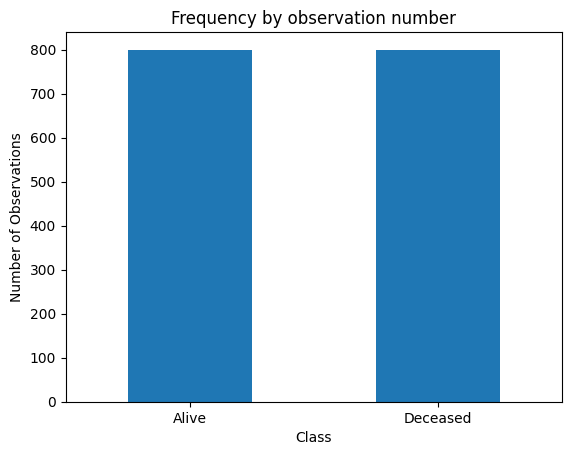

In [4]:
# check distribution of target variable
print(df.estado_vital.value_counts())

count_classes = pd.value_counts(df['estado_vital'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ['Alive', 'Deceased'])
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")

1215 out of 1353 cases in this dataset are labelled alive, and 138 cases are labelled dead. This suggests that the dataset is not balanced. We will need to take this into account when we split the dataset into training and test sets.

<Axes: >

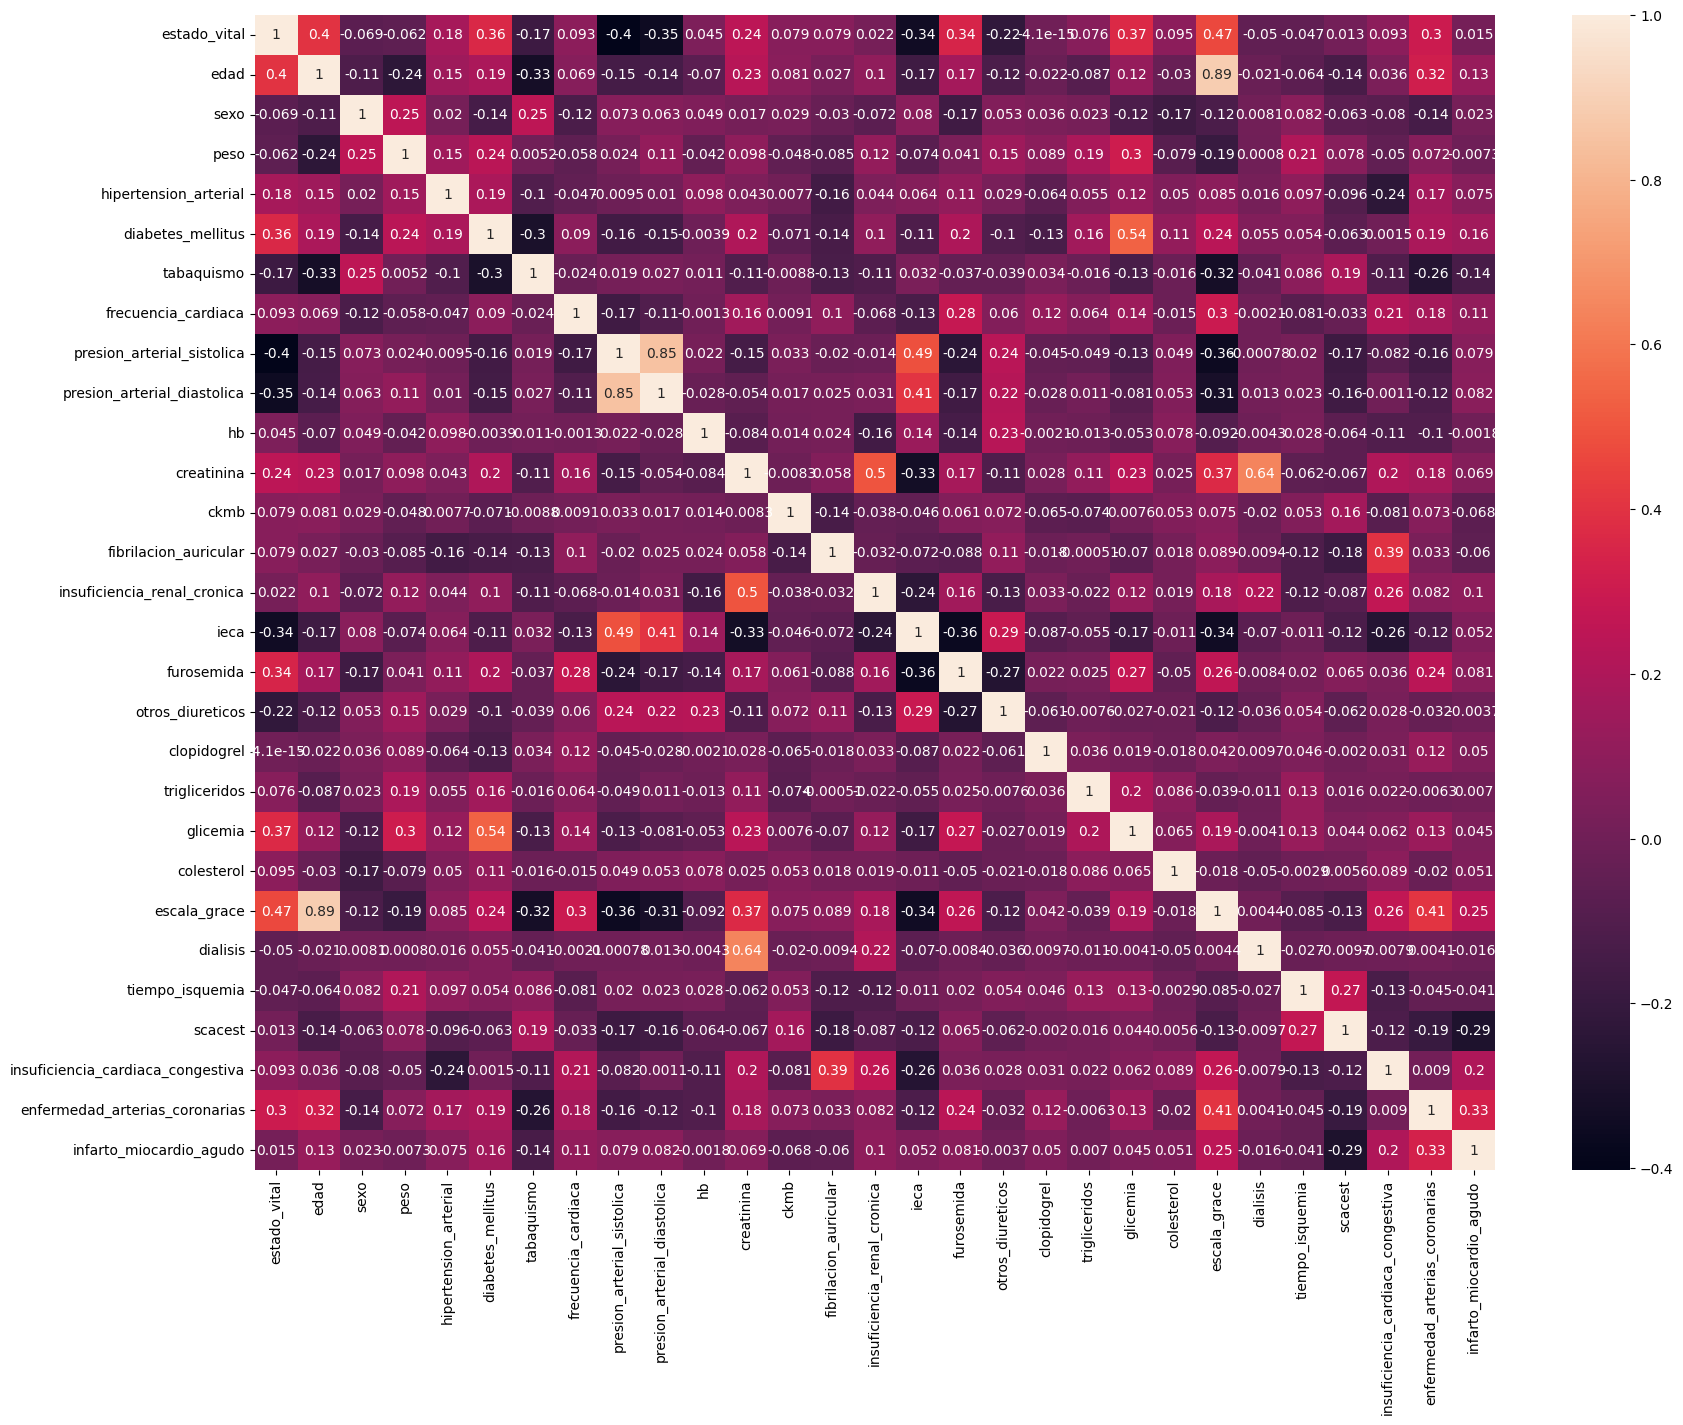

In [5]:
# check correlations
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

A heatmap shows correlations between variables in the dataset. From the above heatmap, we see that no features directly correlate with the label (estado_vital) and that generally, there do not exist significant correlations between other variables. However, correlations exist between two variables:
- Creatinina and insufuciencia_renal_crónica are correlated with a score of 0.52.
- Edad with estado_vital are correlated with a score of 0.41.


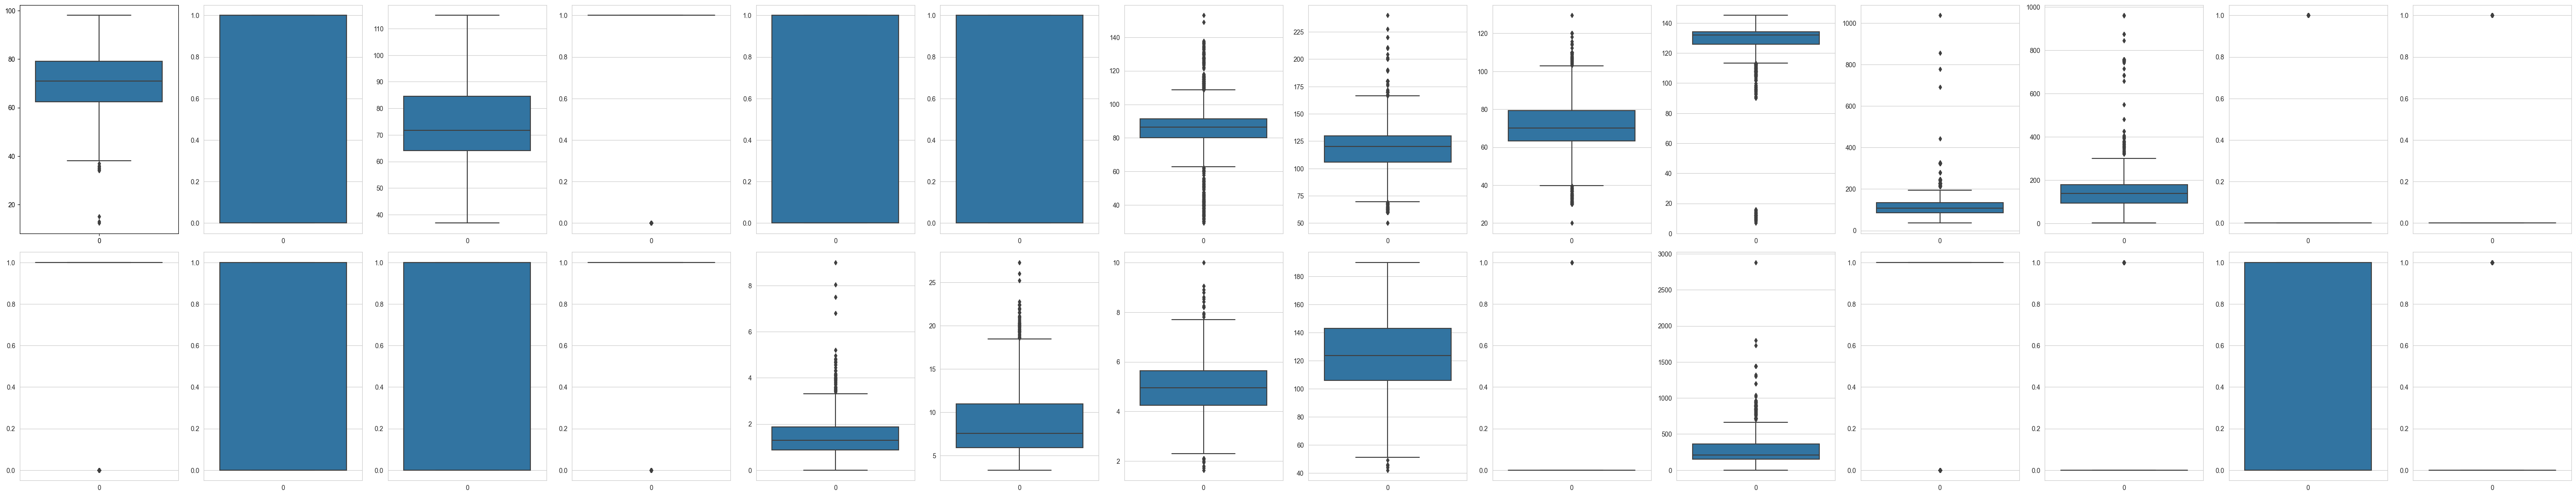

In [6]:
# check outliers

def check_outliers(df):
    l = df.columns.values
    number_of_columns=(len(l)-1)/2
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows + 1,int(number_of_columns),i)
        sns.set_style('whitegrid')
        sns.boxplot(df[l[i]],orient='v')
        plt.tight_layout()
        
check_outliers(df)

The above boxplots confirm our suspicion that there are outliers in the dataset. There appear to be several outliers in the systolic and diastolic variables. These outliers might be explained by human error when entering data into the .csv format. Our prediction model might benefit if these outliers were removed from the data.

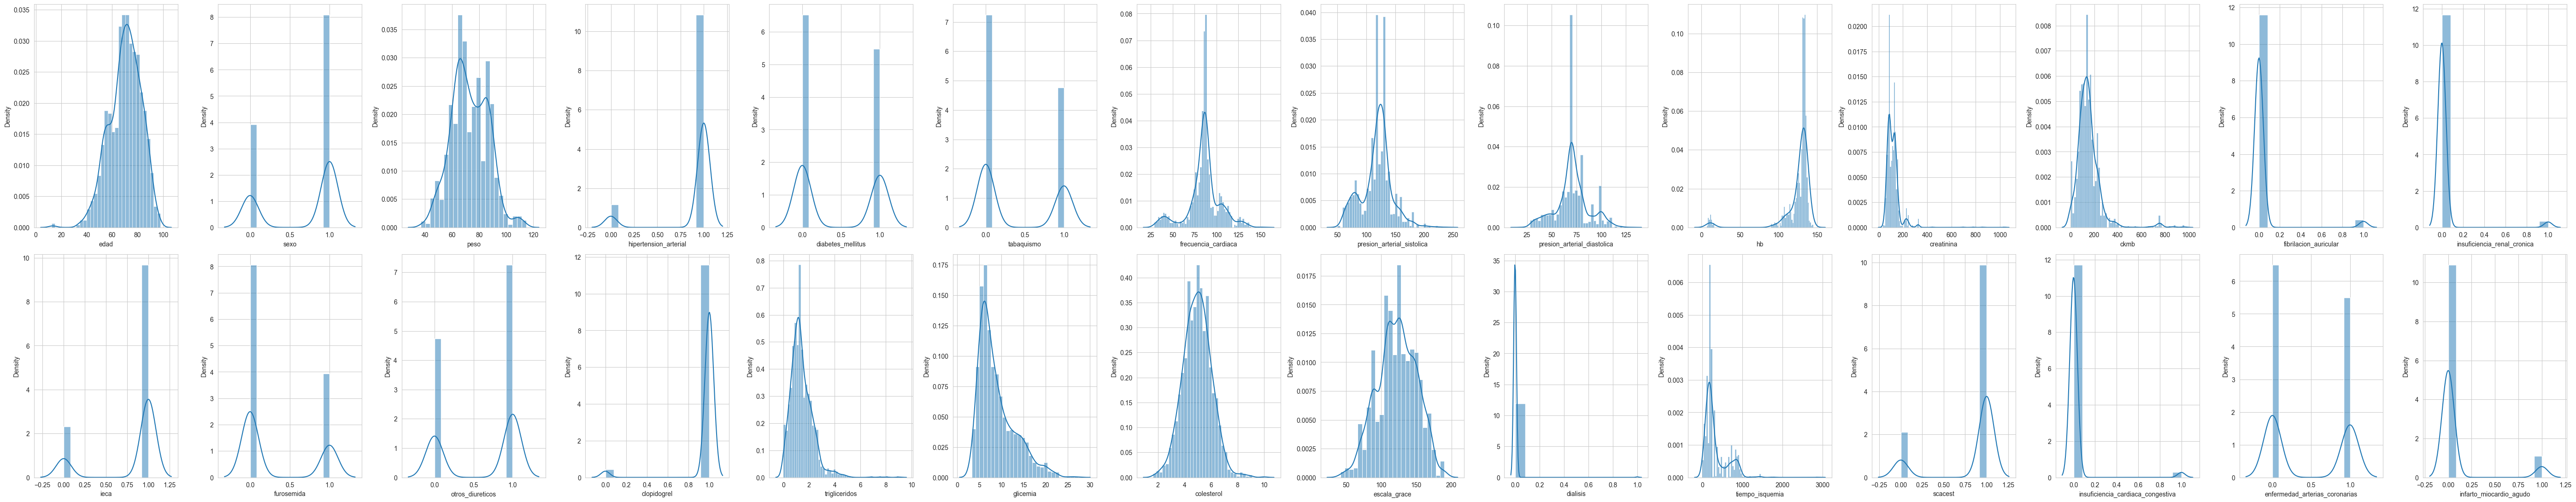

In [7]:
# check distribution and skew
def check_dist(df):
    l = df.columns.values
    number_of_columns=(len(l)-1)/2
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows+1,int(number_of_columns),i)
        sns.histplot(df[l[i]],kde=True,stat='density', kde_kws=dict(cut=3)) 
        plt.tight_layout()
        
check_dist(df)

Histograms show the distribution of each feature in the dataset. There appears to be some variation in weight, but edad, frecuencia cardiaca and creatinina are roughly normally distributed. However, the histograms further suggest the presence of outliers in the blood pressure features. Moreover, there exist categorical features in the dataset, such as sexo, hipertension_arterial, diabetes_mellitus, tabaquismo, fibricación auricular, insuficiencia renal cronica, ieca, furosemida, otros diureticos y clopidogrel.

Note that we are dealing with a mix of continuous, ordinal, and binary data, as confirmed from the above data analysis. We can combine all of these data types in one model. Here are a few typical steps we took to preprocess this data before modeling.

- Standardize all continuous features: All continuous input should be standardized. For every continuous feature, compute its mean (𝜇) and standard deviation (𝜎) and calculate 𝑥 = (𝑥−𝜇) / 𝜎.
- Binarize categorical/discrete features (create dummy variables): For all categorical features, represent them as multiple boolean features. For example, instead of having one feature called cholesterol, have 3 boolean features - chol_normal, chol_above_normal, chol_well_above_normal and appropriately set these features to 0 or 1. As can be seen, for every categorical feature, k binary features are added, where k is the number of values that the categorical feature takes.

In [28]:
# cont_cols = ['edad','peso','presion_arterial_sistolica','presion_arterial_diastolica','frecuencia_cardiaca','hb','creatinina','ckmb']
# bin_cols = ['estado_vital','sexo','hipertension_arterial','diabetes_mellitus','tabaquismo','fibrilacion_auricular','insuficiencia_renal_cronica','ieca','furosemida','otros_diureticos','clopidogrel']
cont_cols = ['edad','peso','frecuencia_cardiaca','presion_arterial_sistolica','presion_arterial_diastolica','hb','creatinina','ckmb','trigliceridos','glicemia','colesterol','escala_grace','tiempo_isquemia']
bin_cols = ['estado_vital','sexo','hipertension_arterial','diabetes_mellitus','tabaquismo','fibrilacion_auricular','insuficiencia_renal_cronica','ieca','furosemida','otros_diureticos','clopidogrel','dialisis','scacest','insuficiencia_cardiaca_congestiva','enfermedad_arterias_coronarias','infarto_miocardio_agudo']

# create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# create an object to transform the data to fit minmax processor
df_scaled = min_max_scaler.fit_transform(df[cont_cols])

# run the normalizer on the dataframe
df_normalized = pd.DataFrame(df_scaled)
df_normalized.columns = cont_cols
df_normalized.head()

,edad,peso,frecuencia_cardiaca,presion_arterial_sistolica,presion_arterial_diastolica,hb,creatinina,ckmb,trigliceridos,glicemia,colesterol,escala_grace,tiempo_isquemia
0,0.007505,0.616698,0.248750,0.368421,0.456931,0.934835,0.033812,0.383333,0.266667,0.162500,0.473832,0.027027,0.118056
1,0.030858,0.258138,0.531478,0.368421,0.456931,0.884152,0.068819,0.150000,0.200000,0.312500,0.378165,0.108108,0.125000
2,0.252710,0.360584,0.474933,0.421053,0.456931,0.956557,0.044814,0.094792,0.122222,0.070833,0.270540,0.074324,0.048611
3,0.252710,0.424612,0.442621,0.368421,0.456931,0.920354,0.055817,0.000000,0.033333,0.087500,0.246623,0.000000,0.069444
4,0.264386,0.616698,0.377997,0.368421,0.456931,0.920354,0.042814,0.371875,0.122222,0.087500,0.390124,0.074324,0.041667


In [29]:
df_normalized = pd.concat([df_normalized, df[bin_cols]], axis=1)

df_normalized.head()

,edad,peso,frecuencia_cardiaca,presion_arterial_sistolica,presion_arterial_diastolica,hb,creatinina,ckmb,trigliceridos,glicemia,...,insuficiencia_renal_cronica,ieca,furosemida,otros_diureticos,clopidogrel,dialisis,scacest,insuficiencia_cardiaca_congestiva,enfermedad_arterias_coronarias,infarto_miocardio_agudo
0,0.007505,0.616698,0.248750,0.368421,0.456931,0.934835,0.033812,0.383333,0.266667,0.162500,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
1,0.030858,0.258138,0.531478,0.368421,0.456931,0.884152,0.068819,0.150000,0.200000,0.312500,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.252710,0.360584,0.474933,0.421053,0.456931,0.956557,0.044814,0.094792,0.122222,0.070833,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.252710,0.424612,0.442621,0.368421,0.456931,0.920354,0.055817,0.000000,0.033333,0.087500,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.264386,0.616698,0.377997,0.368421,0.456931,0.920354,0.042814,0.371875,0.122222,0.087500,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [30]:
# save this cleaned data
df_normalized.to_csv('data_cleaned.csv', index=False)

# Support Vector Machine (SVM) classifier

In [31]:
# try an SVM Classifier
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

df_normalized= df_normalized.dropna()
print(df_normalized.shape)
X_train = df_normalized.drop('estado_vital', axis=1)
y_train = df_normalized['estado_vital']
# class wights
# class_weight = {0: 1, 1: len(y) / sum(y)}

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5) # 80% training and 20% test

(1600, 29)


In [12]:

# Leer el archivo de Ejecución
df2 = pd.read_excel('../Mortalidad FINAL.xlsx',sheet_name='Ejecucion')
df2=df[['edad','peso','frecuencia_cardiaca','presion_arterial_sistolica','presion_arterial_diastolica','hb','creatinina','ckmb','trigliceridos','glicemia','colesterol','escala_grace','tiempo_isquemia','estado_vital','sexo','hipertension_arterial','diabetes_mellitus','tabaquismo','fibrilacion_auricular','insuficiencia_renal_cronica','ieca','furosemida','otros_diureticos','clopidogrel','dialisis','scacest','insuficiencia_cardiaca_congestiva','enfermedad_arterias_coronarias','infarto_miocardio_agudo']]

df_scaled = min_max_scaler.fit_transform(df2[cont_cols])
df_normalized2 = pd.DataFrame(df_scaled)
df_normalized2.columns = cont_cols

df_normalized2 = pd.concat([df_normalized2, df2[bin_cols]], axis=1)

df_normalized2= df_normalized2.dropna()
df_normalized2 = df2.sample(n=len(df_normalized), random_state=1)
df_normalized2 = df_normalized2.reindex(columns=df_normalized.columns)
df_normalized.to_csv('data_cleaned2.csv', index=False)
X_test=df_normalized2.drop('estado_vital', axis=1)
y_test = df_normalized2['estado_vital']

In [13]:
# create a svm classifier
clf = svm.SVC(kernel='rbf') # rbf kernel
# train the model using the training sets
clf.fit(X_train, y_train)

SVC()

In [14]:
# evaluate the model
def evaluate_model(clf, X_test, y_test):

    # predict the response for test dataset
    y_pred = clf.predict(X_test)
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels='Alive' , yticklabels='Deceased', annot=True, fmt="d")
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, y_pred))
    # calc auc
#     probas = clf.predict_proba(X_test)
#     auc = roc_auc_score(testy, probs)
#     print('AUC: %.3f' % auc)

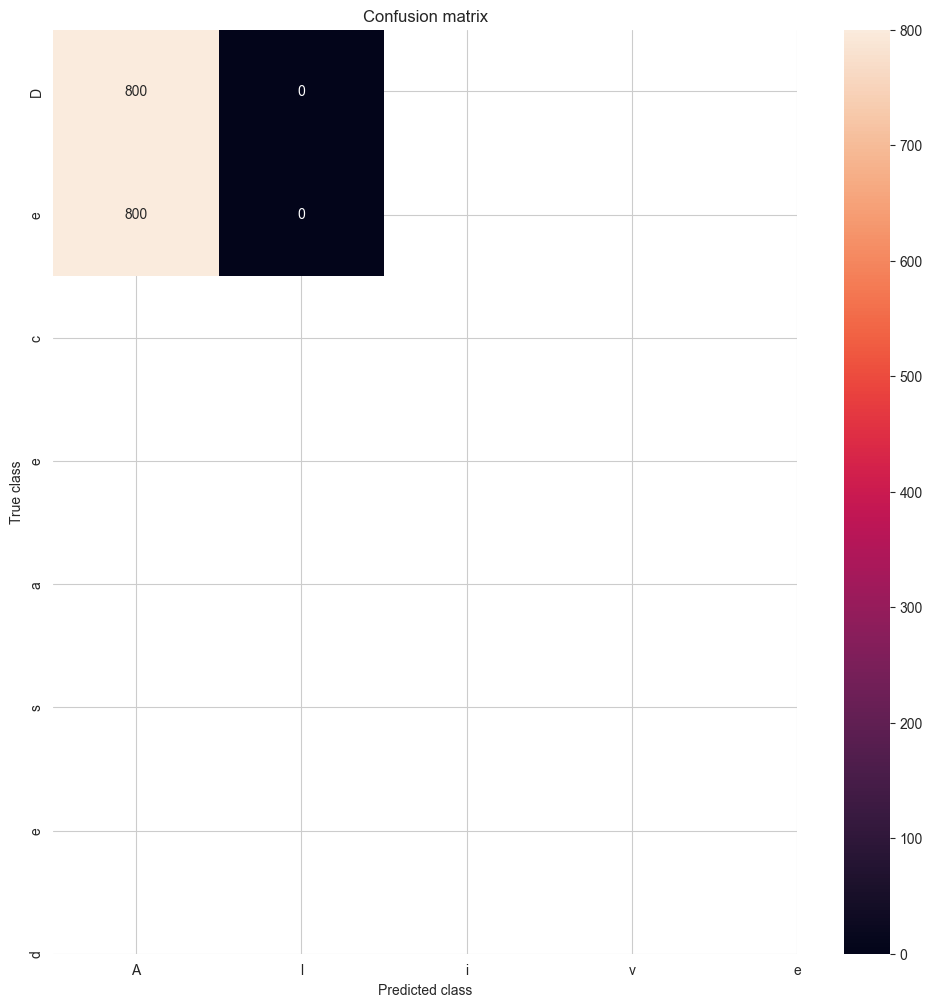

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       800
         1.0       0.00      0.00      0.00       800

    accuracy                           0.50      1600
   macro avg       0.25      0.50      0.33      1600
weighted avg       0.25      0.50      0.33      1600



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
evaluate_model(clf, X_test, y_test)


# Random Forest classifier

In [16]:
# try Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# create a Gaussian Classifier
rf_clf = RandomForestClassifier(n_estimators=20)

# train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

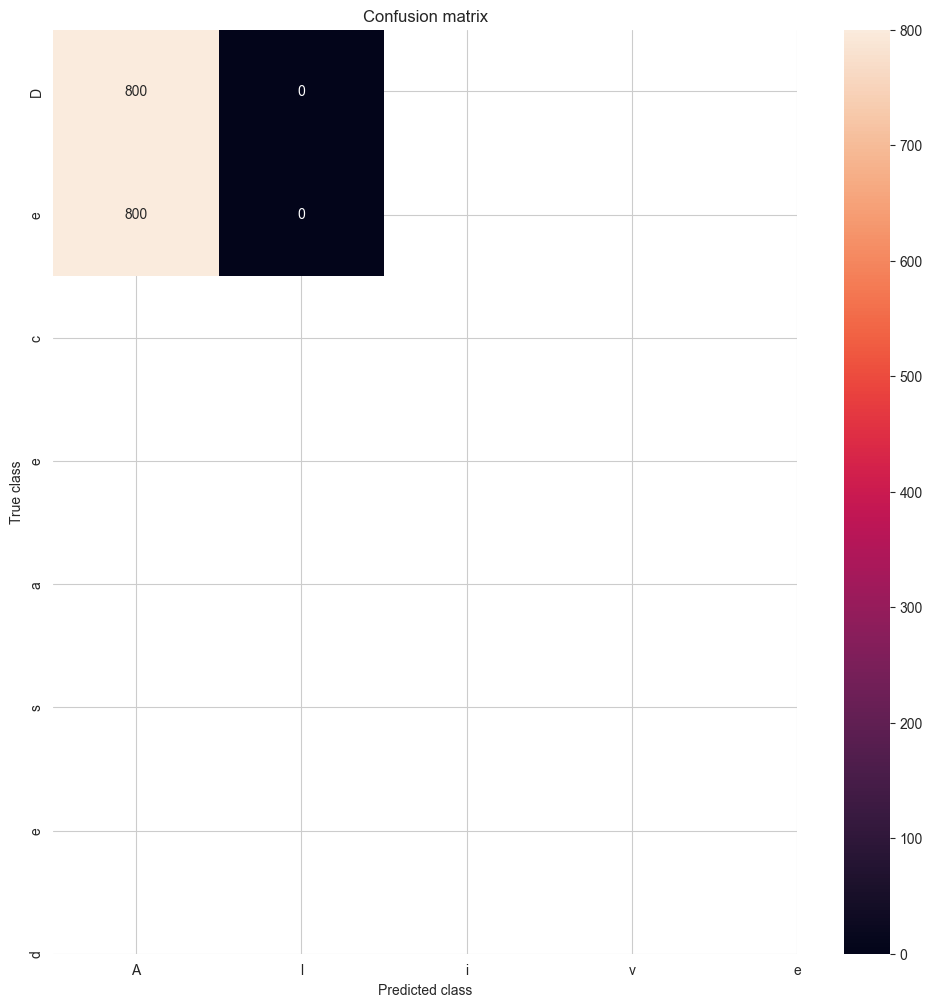

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       800
         1.0       0.00      0.00      0.00       800

    accuracy                           0.50      1600
   macro avg       0.25      0.50      0.33      1600
weighted avg       0.25      0.50      0.33      1600



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


presion_arterial_diastolica    0.184968
creatinina                     0.168132
edad                           0.123865
frecuencia_cardiaca            0.109037
ckmb                           0.092470
presion_arterial_sistolica     0.086843
peso                           0.058025
diabetes_mellitus              0.042807
hb                             0.031598
furosemida                     0.022306
ieca                           0.021772
otros_diureticos               0.019005
hipertension_arterial          0.012182
sexo                           0.008800
tabaquismo                     0.007640
fibrilacion_auricular          0.005524
insuficiencia_renal_cronica    0.002637
clopidogrel                    0.002389
dtype: float64

In [17]:
evaluate_model(rf_clf, X_test, y_test)

# get feature importances
feature_imp = pd.Series(rf_clf.feature_importances_,index=X_test.columns).sort_values(ascending=False)
feature_imp

# Logistic Regression classifier

In [18]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
def lrcv(key, target_vars, df, resample=True):
    X = df.drop(target_vars[key], axis=1)
    y = df[key]
    print('\n{0}\n'.format(key))

    cols = X.columns
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10) # 80% training and 20% test

    if resample:
        smote = SMOTE()
        print("Before oversampling, counts of label '1': {}".format(sum(y_train==1)))
        print("Before oversampling, counts of label '0': {} \n".format(sum(y_train==0)))
        X_train, y_train = smote.fit_sample(X_train, y_train.ravel())
        print("After oversampling, counts of label '1': {}".format(sum(y_train==1)))
        print("After oversampling, counts of label '0': {} \n".format(sum(y_train==0)))
#         plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')
        
    clf = LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
#     predicted = cross_val_predict(LogisticRegression(), X, y, cv=cv)
    print('accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
    print(metrics.classification_report(y_test, y_pred))
    
    feature_coefs = pd.Series(clf.coef_.reshape(-1),index=cols).sort_values(ascending=False)
    print(feature_coefs)
    
    print('Confusion matrix:\n')
    cm = metrics.confusion_matrix(y_test,y_pred)
    df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in [0,1]])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, fmt="d")

    return clf


estado_vital

accuracy: 0.8125
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81       156
         1.0       0.81      0.83      0.82       164

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320

glicemia                             0.200294
furosemida                           0.062811
diabetes_mellitus                    0.061217
enfermedad_arterias_coronarias       0.059550
edad                                 0.037281
colesterol                           0.028354
hipertension_arterial                0.027257
trigliceridos                        0.018027
escala_grace                         0.011121
fibrilacion_auricular                0.010830
hb                                   0.009230
creatinina                           0.008870
sexo                                 0.006637
presion_arterial_diastolica          0.0030

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


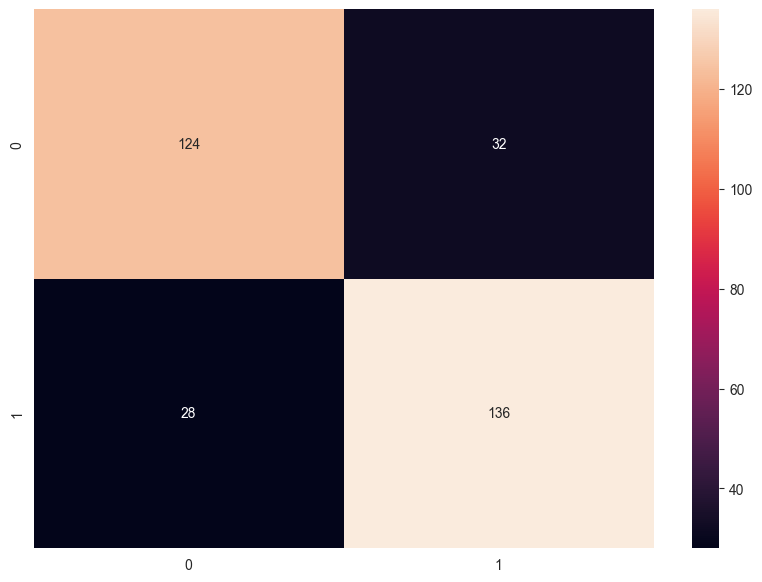

In [20]:
target_vars = {'estado_vital': ['estado_vital']}

clf = lrcv('estado_vital', target_vars, df, resample=False)

# K-Fold Cross Validation

In [21]:
from sklearn import svm
from sklearn.model_selection import *
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def evaluate(C, X_test, y_test):
    y_pred = C.predict(X_test)
    
    k_fold = KFold(10, shuffle = False, random_state=None) #10-fold cross-validation
    cv_scores = cross_val_score(C, X_test, y_test.values.ravel(), cv = k_fold)

    print("Cross-validation score means: ", cv_scores.mean())
    
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    
    print(classification_report(y_test, y_pred))
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels='Alive' , yticklabels='Deceased', annot=True, fmt="d")
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

Cross-validation score means:  0.8362499999999999
Accuracy:  0.5
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       800
         1.0       0.00      0.00      0.00       800

    accuracy                           0.50      1600
   macro avg       0.25      0.50      0.33      1600
weighted avg       0.25      0.50      0.33      1600



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


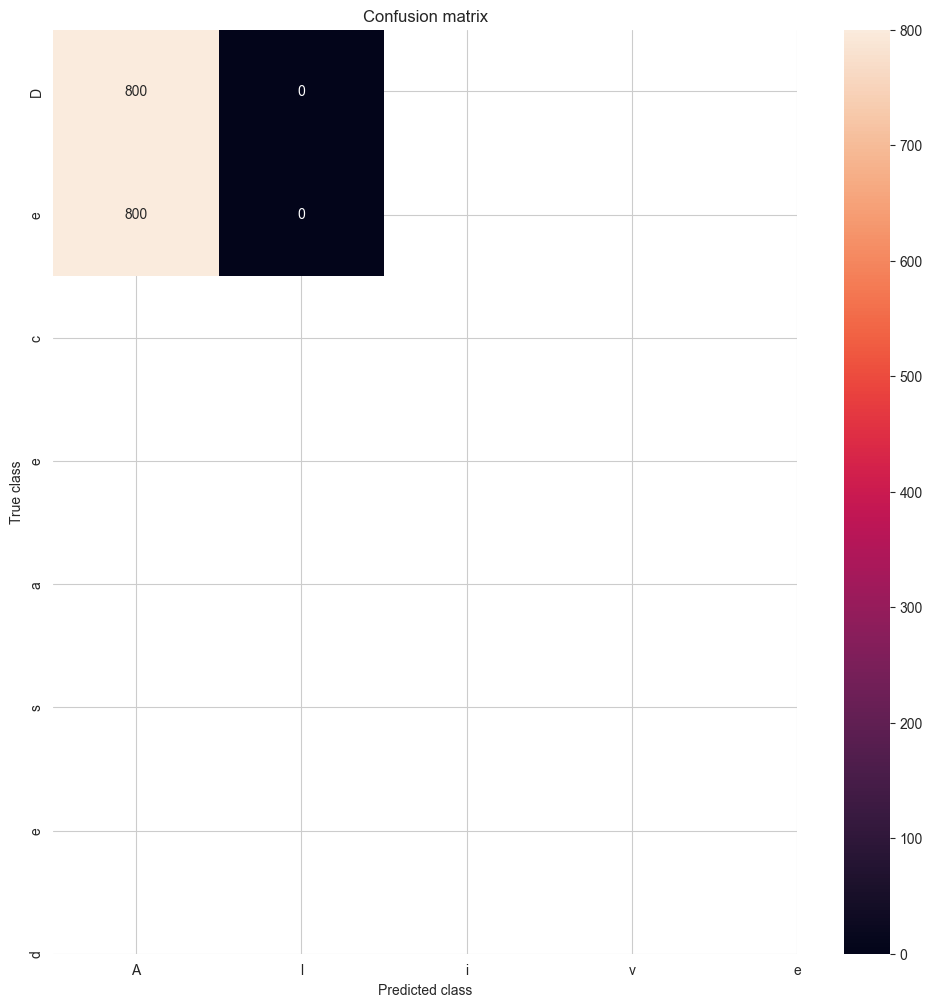

In [22]:
#training SVM SVC w/rbf kernel
C = svm.SVC(gamma = 'scale') #create classifier
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)

Cross-validation score means:  0.7856250000000001
Accuracy:  0.5
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       800
         1.0       0.00      0.00      0.00       800

    accuracy                           0.50      1600
   macro avg       0.25      0.50      0.33      1600
weighted avg       0.25      0.50      0.33      1600



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


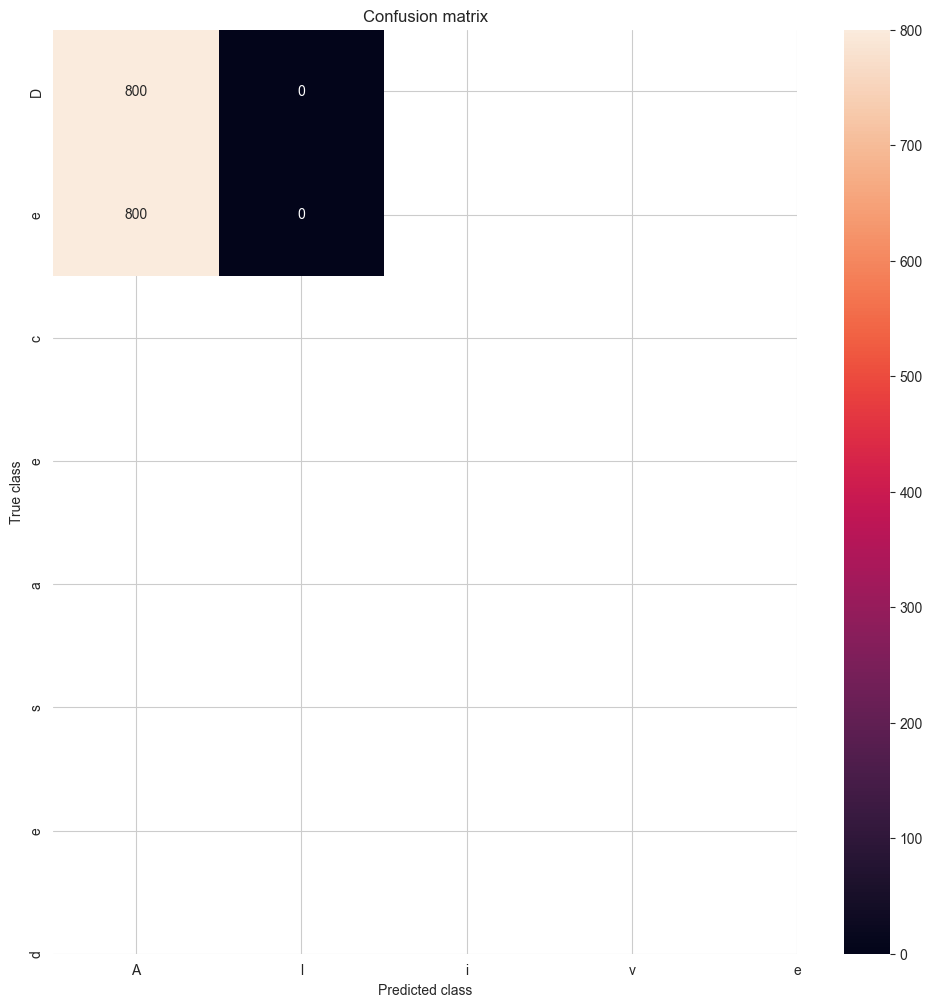

In [23]:
#training Gaussian Naive Bayes classifier
C = GaussianNB()
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Cross-validation score means:  0.85375
Accuracy:  0.543125
              precision    recall  f1-score   support

         0.0       0.79      0.12      0.20       800
         1.0       0.52      0.97      0.68       800

    accuracy                           0.54      1600
   macro avg       0.66      0.54      0.44      1600
weighted avg       0.66      0.54      0.44      1600



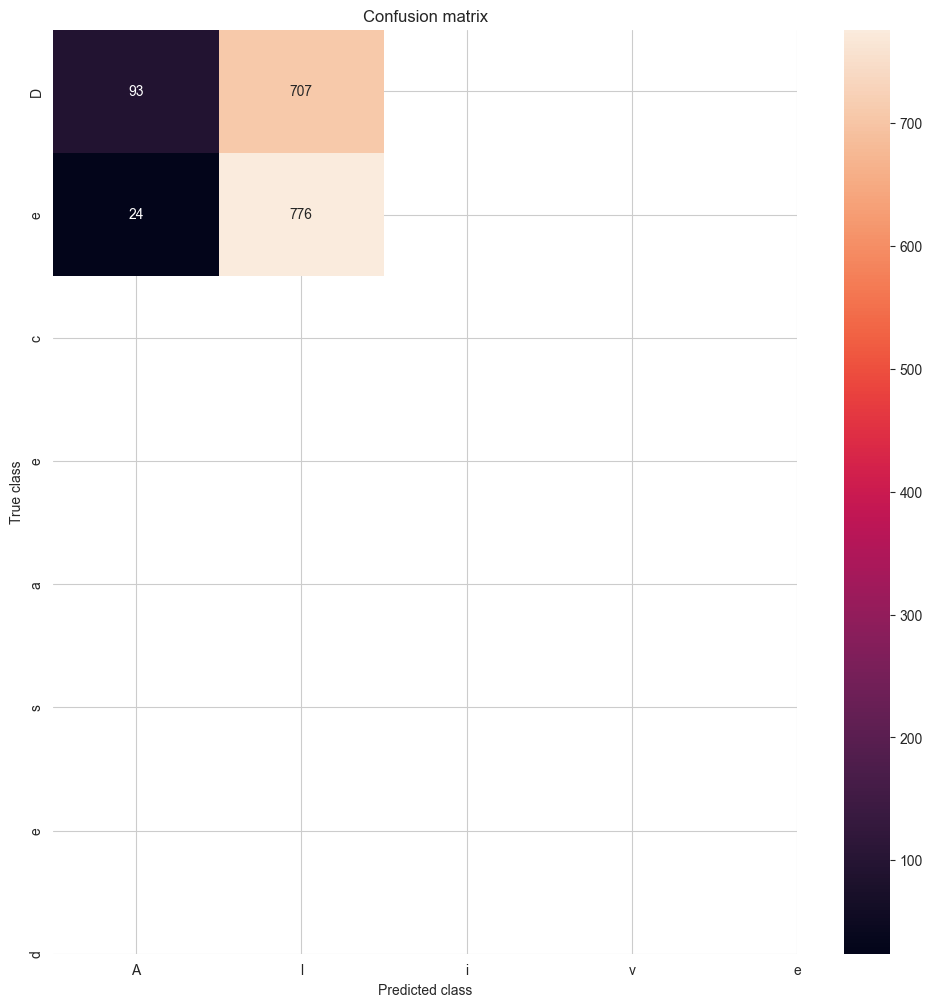

In [24]:
#training supervised MLP
C = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes = (20,))
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)

Cross-validation score means:  0.8881249999999999
Accuracy:  0.4775
              precision    recall  f1-score   support

         0.0       0.49      0.90      0.63       800
         1.0       0.35      0.05      0.09       800

    accuracy                           0.48      1600
   macro avg       0.42      0.48      0.36      1600
weighted avg       0.42      0.48      0.36      1600



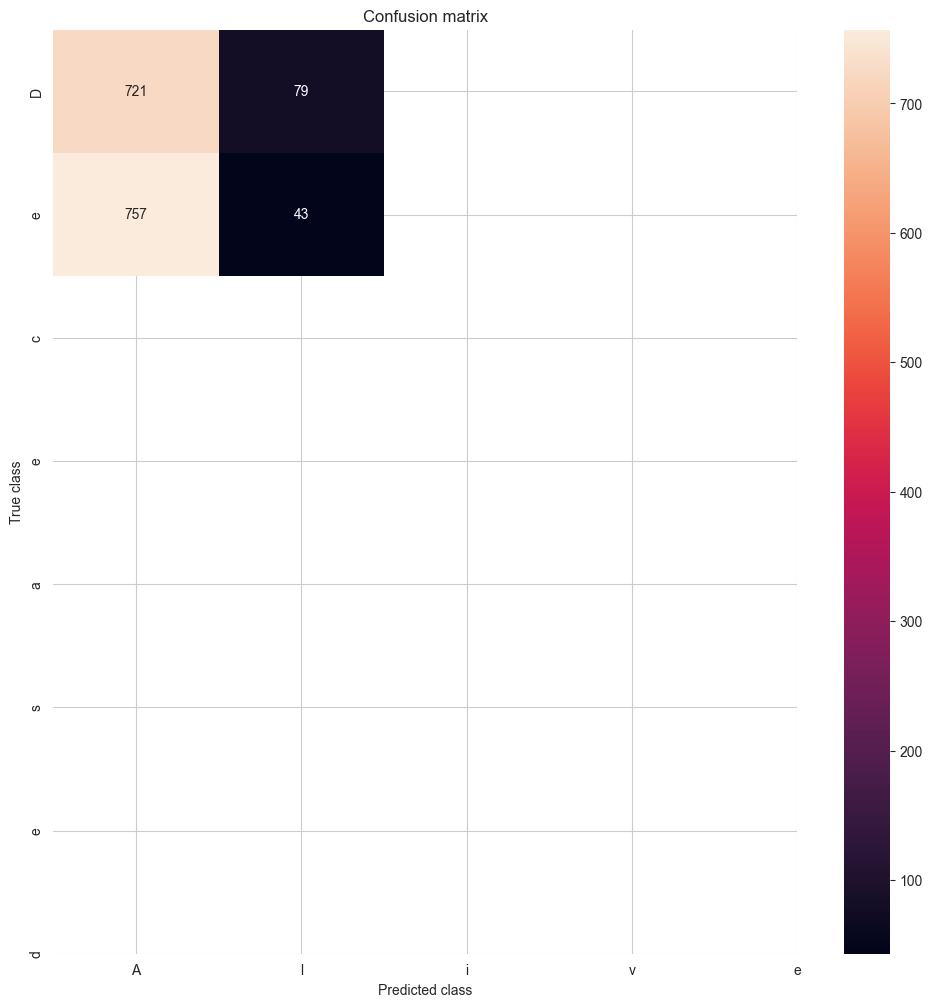

In [25]:
#training KNN
C = KNeighborsClassifier(n_neighbors = 17)
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)

Cross-validation score means:  0.98125
Accuracy:  0.5
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       800
         1.0       0.00      0.00      0.00       800

    accuracy                           0.50      1600
   macro avg       0.25      0.50      0.33      1600
weighted avg       0.25      0.50      0.33      1600



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


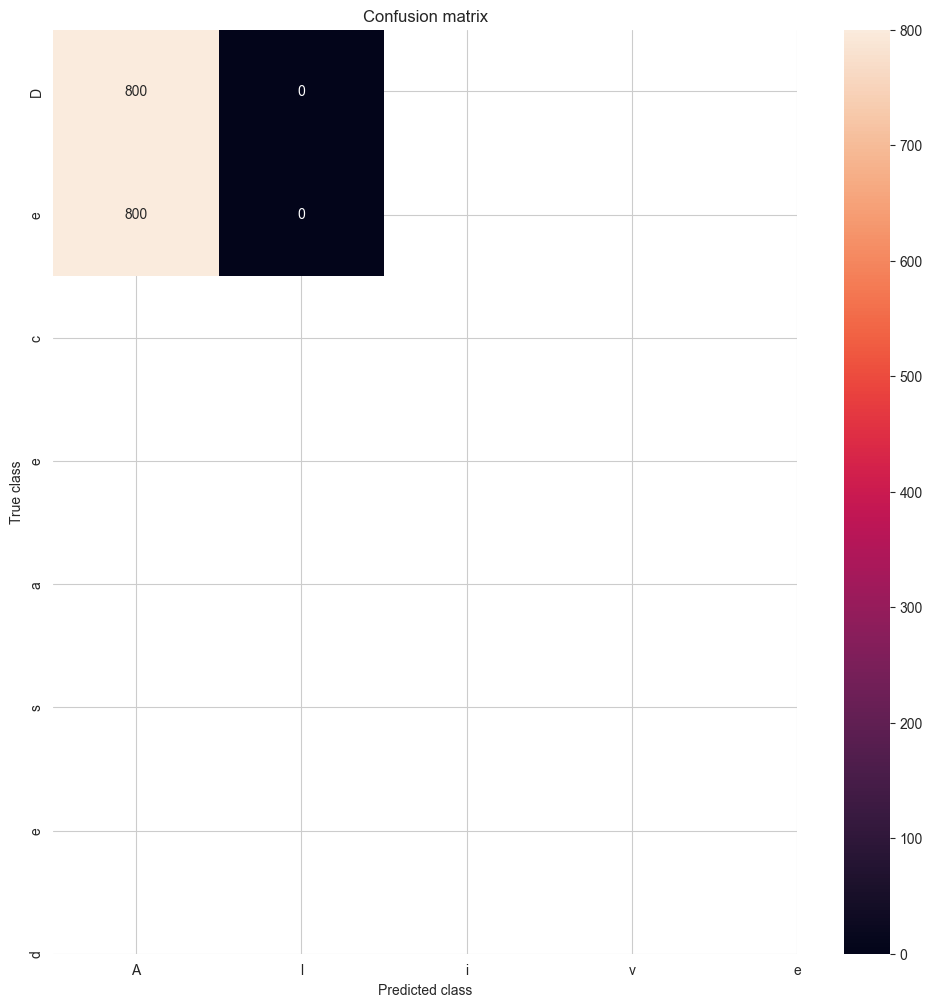

In [26]:
#training random forest classifier
C = RandomForestClassifier(n_estimators = 100)
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross-validation score means:  0.8006249999999999
Accuracy:  0.5425
              precision    recall  f1-score   support

         0.0       1.00      0.09      0.16       800
         1.0       0.52      1.00      0.69       800

    accuracy                           0.54      1600
   macro avg       0.76      0.54      0.42      1600
weighted avg       0.76      0.54      0.42      1600



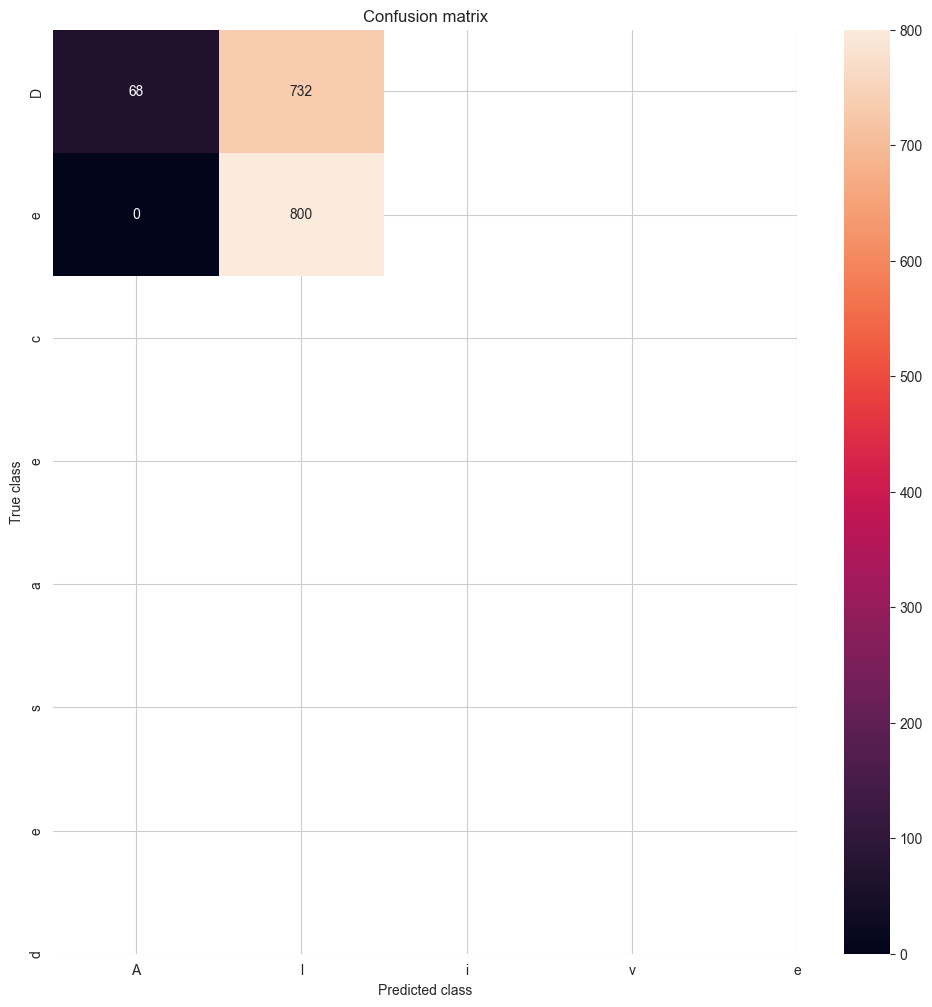

In [27]:
#Training logistic regression model
C = LogisticRegression(solver = 'lbfgs')
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)